# Q1b - Evaluate whether older planes suffer more delays on a year-to-year basis.

## Reading in files

In [5]:
import pandas as pd

df_2004 = pd.read_csv ('2004.csv.bz2')
df_2005 = pd.read_csv ('2005.csv.bz2')
df_2006 = pd.read_csv ('2006.csv.bz2')
df_2007 = pd.read_csv ('2007.csv.bz2')
df_2008 = pd.read_csv ('2008.csv.bz2')

airports = pd.read_csv('airports.csv')

carriers = pd.read_csv('carriers.csv')

planedata = pd.read_csv('plane-data.csv')

variable_descriptions = pd.read_csv('variable-descriptions.csv')

In [12]:
planedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5029 entries, 0 to 5028
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tailnum        5029 non-null   object 
 1   type           4480 non-null   object 
 2   manufacturer   4480 non-null   object 
 3   issue_date     4479 non-null   object 
 4   model          4480 non-null   object 
 5   status         4480 non-null   object 
 6   aircraft_type  4480 non-null   object 
 7   engine_type    4477 non-null   object 
 8   year           4335 non-null   float64
dtypes: float64(1), object(8)
memory usage: 353.7+ KB


In [14]:
print(df_2004.columns)

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


## Identifying and cross referencing flights in planedata with each corresponding df

In [77]:
actuallyflew_2004 = planedata[planedata['tailnum'].isin(df_2004['TailNum'])]
actuallyflew_2005 = planedata[planedata['tailnum'].isin(df_2005['TailNum'])]
actuallyflew_2006 = planedata[planedata['tailnum'].isin(df_2006['TailNum'])]
actuallyflew_2007 = planedata[planedata['tailnum'].isin(df_2007['TailNum'])]
actuallyflew_2008 = planedata[planedata['tailnum'].isin(df_2008['TailNum'])]

# Making 'age' variable based on 'year' 
actuallyflew_2004["age"] = 2004 - actuallyflew_2004["year"]
actuallyflew_2005["age"] = 2005 - actuallyflew_2005["year"]
actuallyflew_2006["age"] = 2006 - actuallyflew_2006["year"]
actuallyflew_2007["age"] = 2007 - actuallyflew_2007["year"]
actuallyflew_2008["age"] = 2008 - actuallyflew_2008["year"]

actuallyflew_2004

/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/4033416226.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actuallyflew_2004["age"] = 2004 - actuallyflew_2004["year"]
/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/4033416226.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actuallyflew_2005["age"] = 2005 - actuallyflew_2005["year"]
/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/4033416226.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year,age
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992.0,12.0
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002.0,2.0
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992.0,12.0
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998.0,6.0


## Why 'issue date' was not chosen - Also, issue date is an object

In [51]:
# number of non-usable variables - year
negativeage_count4 = (actuallyflew_2004['age'] < 0).sum()
negativeage_count5 = (actuallyflew_2005['age'] < 0).sum()
negativeage_count6 = (actuallyflew_2006['age'] < 0).sum()
negativeage_count7 = (actuallyflew_2007['age'] < 0).sum()
negativeage_count8 = (actuallyflew_2008['age'] < 0).sum()

# Since issue date is an object, we convert it to date time; ruling it out as the correct variable to calculate age.
import pandas as pd
actuallyflew_2004['issue_date'] = pd.to_datetime(actuallyflew_2004['issue_date'])
actuallyflew_2005['issue_date'] = pd.to_datetime(actuallyflew_2005['issue_date'])
actuallyflew_2006['issue_date'] = pd.to_datetime(actuallyflew_2006['issue_date'])
actuallyflew_2007['issue_date'] = pd.to_datetime(actuallyflew_2007['issue_date'])
actuallyflew_2008['issue_date'] = pd.to_datetime(actuallyflew_2008['issue_date'])

# Making 'age_id' variable based on 'issue_date' 
actuallyflew_2004["age_id"] = 2004 - actuallyflew_2004["issue_date"].dt.year # to allow subtraction and return the year
actuallyflew_2005["age_id"] = 2005 - actuallyflew_2005["issue_date"].dt.year
actuallyflew_2006["age_id"] = 2006 - actuallyflew_2006["issue_date"].dt.year
actuallyflew_2007["age_id"] = 2007 - actuallyflew_2007["issue_date"].dt.year
actuallyflew_2008["age_id"] = 2008 - actuallyflew_2008["issue_date"].dt.year

# number of non-usable variables - issue date
negativeage_count_id4 = (actuallyflew_2004['age_id'] < 0).sum()
negativeage_count_id5 = (actuallyflew_2005['age_id'] < 0).sum()
negativeage_count_id6 = (actuallyflew_2006['age_id'] < 0).sum()
negativeage_count_id7 = (actuallyflew_2007['age_id'] < 0).sum()
negativeage_count_id8 = (actuallyflew_2008['age_id'] < 0).sum()

print(
    "Counts based on issue date:" +
    str(negativeage_count_id4) + "," +
    str(negativeage_count_id5) + "," +
    str(negativeage_count_id6) + "," +
    str(negativeage_count_id7) + "," +
    str(negativeage_count_id8),
    
    "Counts based on year:" +
    str(negativeage_count4) + "," +
    str(negativeage_count5) + "," +
    str(negativeage_count6) + "," +
    str(negativeage_count7) + "," +
    str(negativeage_count8) 
)

Counts based on issue date:431,328,270,65,0 Counts based on year:3,3,3,0,0


/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/2453490953.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actuallyflew_2004['issue_date'] = pd.to_datetime(actuallyflew_2004['issue_date'])
/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/2453490953.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actuallyflew_2005['issue_date'] = pd.to_datetime(actuallyflew_2005['issue_date'])
/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/2453490953.py:12: SettingWit

## Visualising age based on year with total delays

In [73]:
# to determine bin size
print(actuallyflew_2004["age_2004"].max())
print(actuallyflew_2005["age_2005"].max())
print(actuallyflew_2006["age_2006"].max())
print(actuallyflew_2007["age_2007"].max())
print(actuallyflew_2008["age_2008"].max())

2004.0
2005.0
2006.0
2007.0
2008.0


/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/2001675178.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actuallyflew_2004['TDelay_04']=(df_2004[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
/var/folders/fy/14hxgrm51svd16v3p0d6pz5h0000gn/T/ipykernel_5830/2001675178.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actuallyflew_2005['TDelay_05']=(df_2005[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircra

ValueError: cannot reindex on an axis with duplicate labels

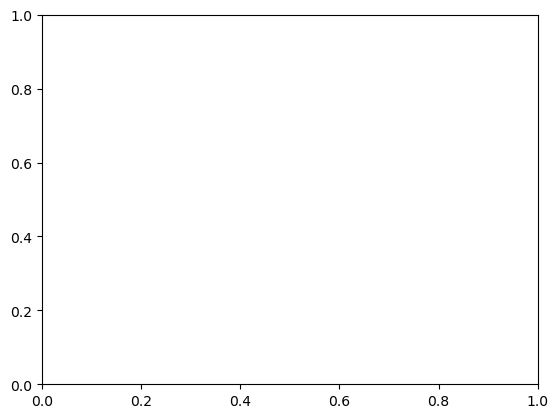

In [81]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# New column using different data sets, returning dataframe, Nan = 0 is treated as skipping
actuallyflew_2004['TDelay_04']=(df_2004[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
actuallyflew_2005['TDelay_05']=(df_2005[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
actuallyflew_2006['TDelay_06']=(df_2006[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
actuallyflew_2007['TDelay_07']=(df_2007[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))
actuallyflew_2008['TDelay_08']=(df_2008[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].fillna(value=0).sum(axis=1))

age_data = pd.concat([actuallyflew_2004, actuallyflew_2005, actuallyflew_2006, actuallyflew_2007, actuallyflew_2008])

age_data['age_group'] = pd.cut(age_data['age'], bins = range (0, 50, 5))
sns.boxplot(data = age_data, x = 'age_group', y = 'TDelay_04')
sns.boxplot(data = age_data, x = 'age_group', y = 'TDelay_05')
sns.boxplot(data = age_data, x = 'age_group', y = 'TDelay_06')
sns.boxplot(data = age_data, x = 'age_group', y = 'TDelay_07')
sns.boxplot(data = age_data, x = 'age_group', y = 'TDelay_08')
